In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

# EDA

In [ ]:
# Load datasets
train = pd.read_csv('./datasets/cleaned_train.csv')
test = pd.read_csv('./datasets/test.csv')
weather = pd.read_csv('./datasets/cleaned_weather.csv')
spray = pd.read_csv('./datasets/spray.csv')

In [ ]:
merged_df = pd.merge(weather, train, on=['Date', 'Year', 'Week', 'Month', 'DayOfWeek'])

In [ ]:
pandas_profiling.ProfileReport(train)

In [ ]:
# use heatmap to find the correlation
def heatmap(df):
    fix, ax = plt.subplots(figsize=(22,22))

    mask = np.zeros_like(df.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    ax = sns.heatmap(df.corr(), mask=mask, ax=ax, cmap='coolwarm',vmin=-1, vmax=1,
                     square=True, linewidth=1,annot=True,annot_kws={'size':'13'},
                     cbar_kws={"shrink": 0.8}, fmt='.1g',center=0)

    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

    ax.set_title('Correlation Heatmap for Merged Data', fontsize=22);

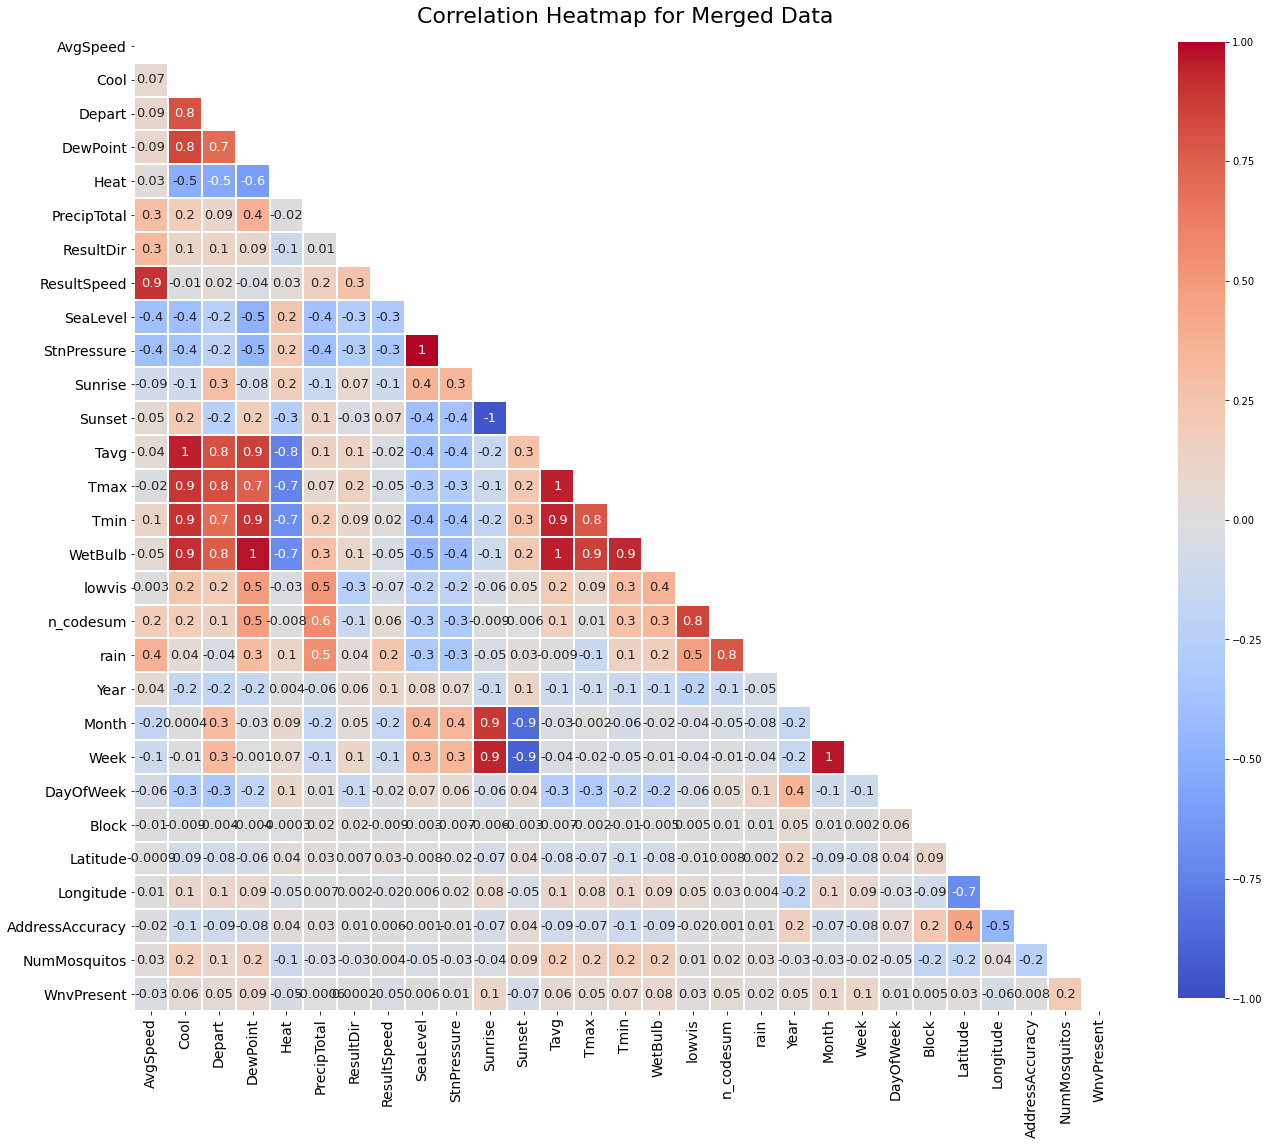

In [ ]:
heatmap(merged_df)

In [ ]:
# Species with West Nile Virus
species_wnv = set((train[train['WnvPresent'] > 0])['Species'])
species_wnv

{'CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS'}

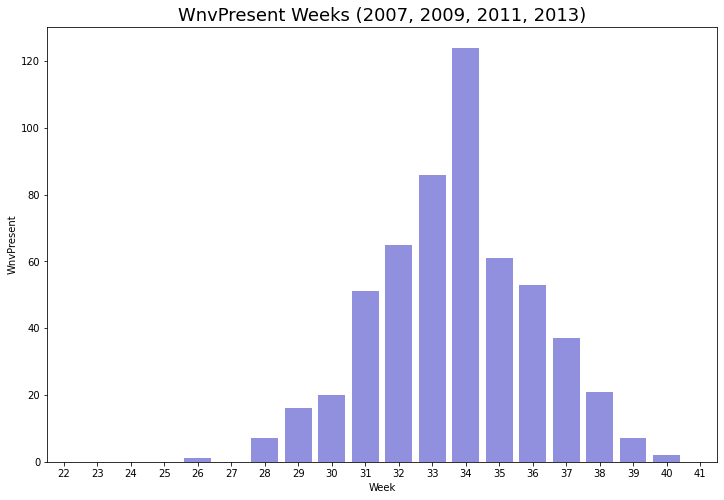

In [ ]:
# Weeks 33-34 tend to have higher incidences of the West Nile Virus
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.barplot(data=train.groupby(by='Week').sum().reset_index(), x='Week', y='WnvPresent', color='#8383EC', ax=ax)
plt.title('WnvPresent Weeks (2007, 2009, 2011, 2013)', fontsize=18);

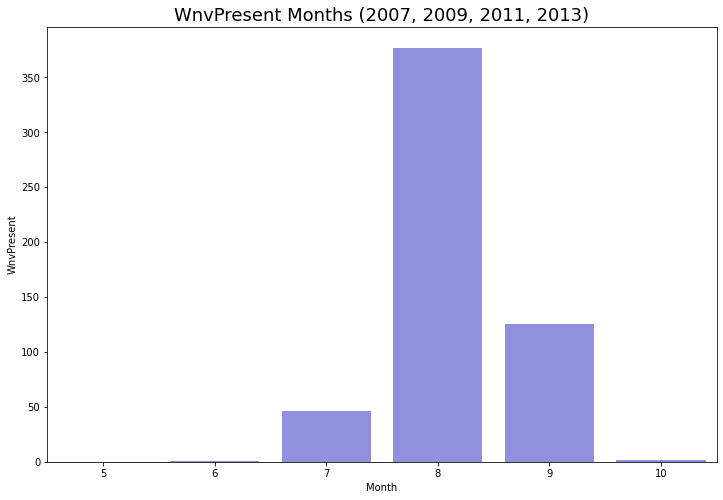

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.barplot(data=train.groupby(by='Month').sum().reset_index(), x='Month', y='WnvPresent', color='#8383EC', ax=ax)
plt.title('WnvPresent Months (2007, 2009, 2011, 2013)', fontsize=18);

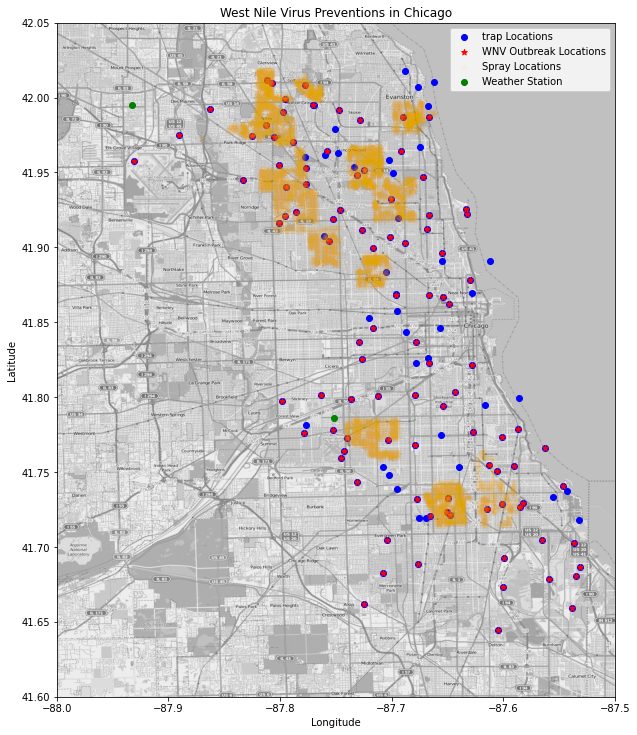

In [ ]:
# outbreak of west nile virus

#Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
#Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level
mapdata = np.loadtxt("assets/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.05)

plt.figure(figsize=(10,16))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)

# trap locations
trap_locations = train[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(trap_locations[:,0], trap_locations[:,1], marker='o', c='b', label='trap Locations')

# wnn outbreak locations
wnv_locations = train[train['WnvPresent'] != 0][['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(wnv_locations[:,0], wnv_locations[:,1], marker='*', c='r', label='WNV Outbreak Locations')

# Spray locations
sprays = spray[['Longitude', 'Latitude']].drop_duplicates()
sprays = sprays[sprays['Latitude'] < 42.3]  #outliers excluded
plt.scatter(sprays['Longitude'], sprays['Latitude'], marker='*', color='orange',alpha=.03, label='Spray Locations')

# Weather locations
plt.scatter(x = (-87.933, -87.752), y = (41.995, 41.786), marker='o', color='g', label='Weather Station')

plt.title('West Nile Virus Preventions in Chicago')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('./assets/heatmap.png');

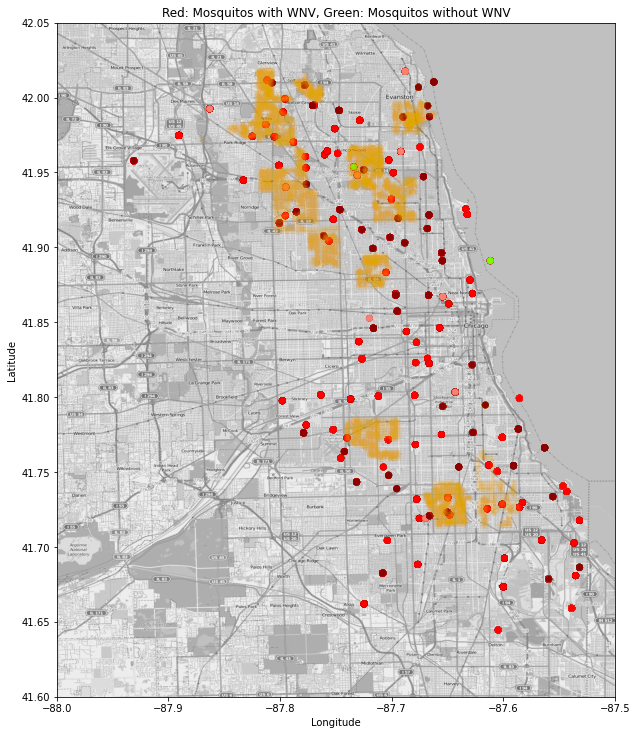

In [ ]:
# outbreak of mosquito that can carry west nile virus

mapdata = np.loadtxt("assets/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.05)

plt.figure(figsize=(10,16))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

present = {'CULEX PIPIENS/RESTUANS':'darkred', 'CULEX RESTUANS':'salmon', 'CULEX PIPIENS':'red', 
           'CULEX SALINARIUS':'lime', 'CULEX TERRITANS':'lawngreen', 'CULEX TARSALIS':'green',
           'CULEX ERRATICUS':'green'}
train['p_colors'] = train['Species'].apply(lambda x: present[x])
plt.scatter(train['Longitude'], train['Latitude'], c=train['p_colors'], marker='o');

# Spray locations
sprays = spray[['Longitude', 'Latitude']].drop_duplicates()
sprays = sprays[sprays['Latitude'] < 42.3]  #outliers excluded
plt.scatter(sprays['Longitude'], sprays['Latitude'], marker='*', color='orange',alpha=.03, label='Spray Locations')

plt.title('Red: Mosquitos with WNV, Green: Mosquitos without WNV')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('heatmap.png');

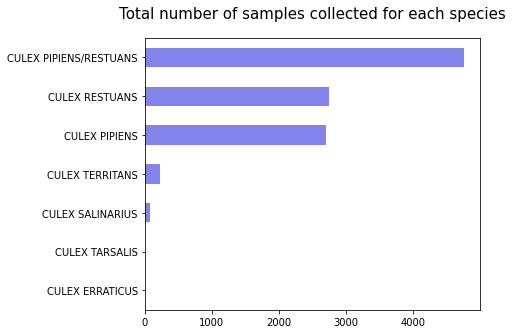

In [ ]:
train['Species'].value_counts(ascending=True).plot(kind='barh', figsize=(6,5), color='#8383EC')
plt.title('Total number of samples collected for each species', fontsize=15, y = 1.05);

                        NumMosquitos  WnvPresent
Species                                         
CULEX ERRATICUS                    7           0
CULEX PIPIENS                  44671         240
CULEX PIPIENS/RESTUANS         66268         262
CULEX RESTUANS                 23431          49
CULEX SALINARIUS                 145           0
CULEX TARSALIS                     7           0
CULEX TERRITANS                  510           0


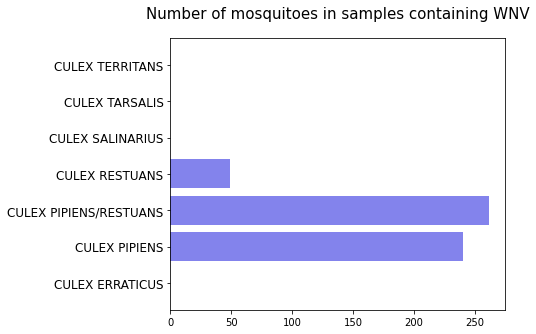

In [ ]:
mos_wnv = train[['Species', 'NumMosquitos', 'WnvPresent']].groupby(by='Species').sum()
print(mos_wnv)

# reset the index after groupby
mos_wnv.reset_index(inplace=True)

plt.figure(figsize=(6,5))
plt.barh(mos_wnv['Species'], mos_wnv['WnvPresent'], color='#8383EC')
plt.title('Number of mosquitoes in samples containing WNV', fontsize=15, y=1.05)
plt.yticks(fontsize=12)
plt.show()

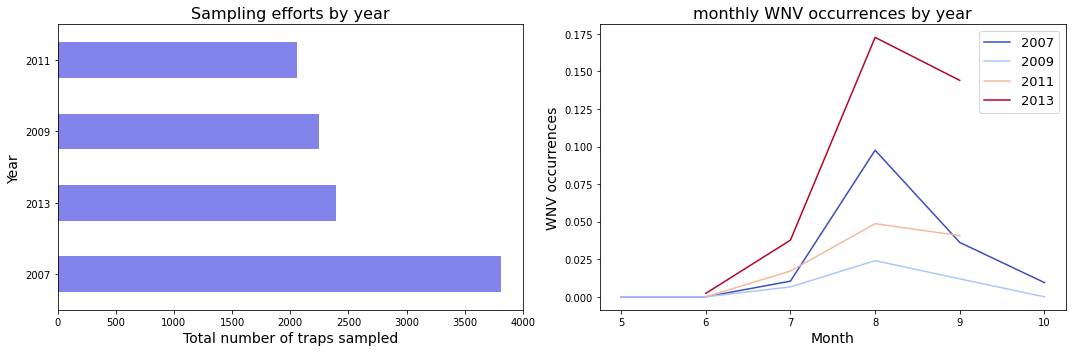

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize=(15,5))

# plot sampling efforts by year
train['Year'].value_counts().plot(kind = 'barh', ax = ax[0], color='#8383EC')
ax[0].set_title('Sampling efforts by year', fontsize=16)
ax[0].set_ylabel('Year', fontsize=14)
ax[0].set_xlabel('Total number of traps sampled',fontsize=14)

sns.lineplot(data = train, x='Month', y='WnvPresent', hue='Year', ci = None, 
             palette = 'coolwarm', ax = ax[1])
ax[1].legend(fontsize = 13)
ax[1].set_title('monthly WNV occurrences by year', fontsize=16)
ax[1].set_xlabel('Month',fontsize=14)
ax[1].set_ylabel('WNV occurrences',fontsize=14)

plt.tight_layout()

/opt/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


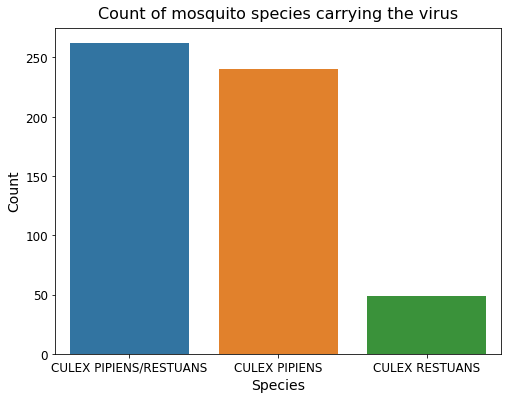

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(train[train['WnvPresent']==1]['Species'])
plt.title('Count of mosquito species carrying the virus', fontsize=16, y=1.01)
plt.tick_params(labelsize=12)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

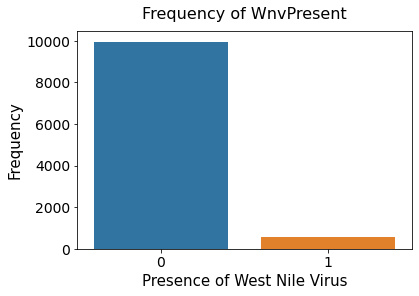

In [ ]:
# The target is imbalanced, which will be taken care of before modelling is done.
sns.barplot(x=[0,1], y=train['WnvPresent'].value_counts())
plt.xlabel('Presence of West Nile Virus', fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.tick_params(labelsize=14)
plt.title('Frequency of WnvPresent',fontsize=16, y=1.03)
plt.show()

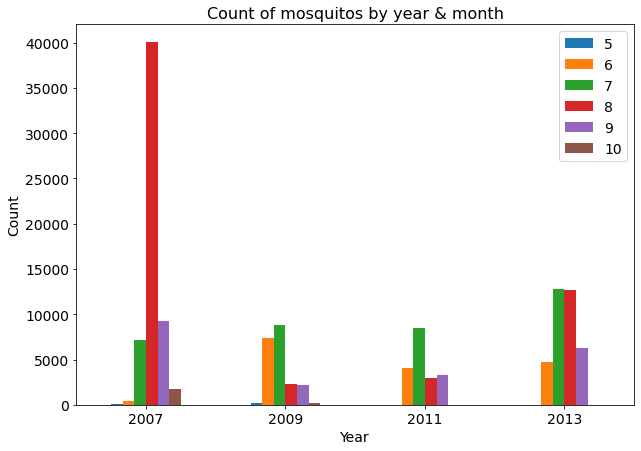

In [ ]:
train.groupby(['Year','Month'])['NumMosquitos'].sum().unstack().plot.bar(figsize=(10,7))
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title('Count of mosquitos by year & month', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.legend(fontsize=14)
plt.show()1

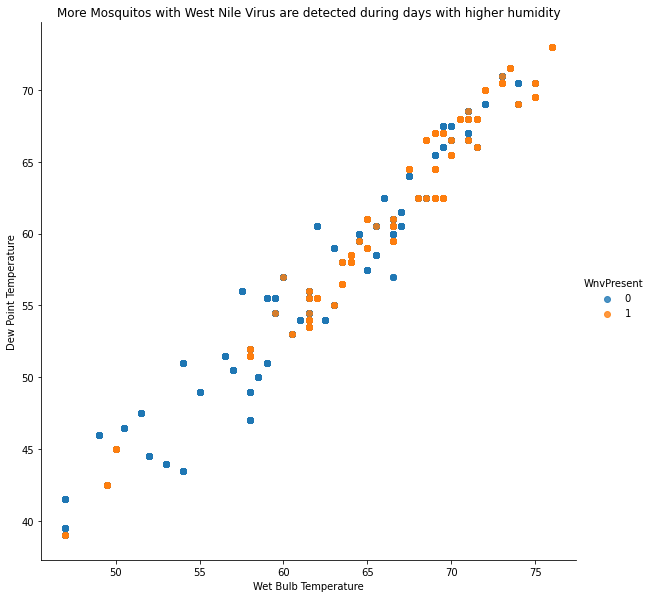

In [ ]:
sns.lmplot( x='WetBulb', y='DewPoint', data=merged_df, fit_reg=False, hue='WnvPresent', height=8)
plt.title('More Mosquitos with West Nile Virus are detected during days with higher humidity')
plt.xlabel('Wet Bulb Temperature')
plt.ylabel('Dew Point Temperature');

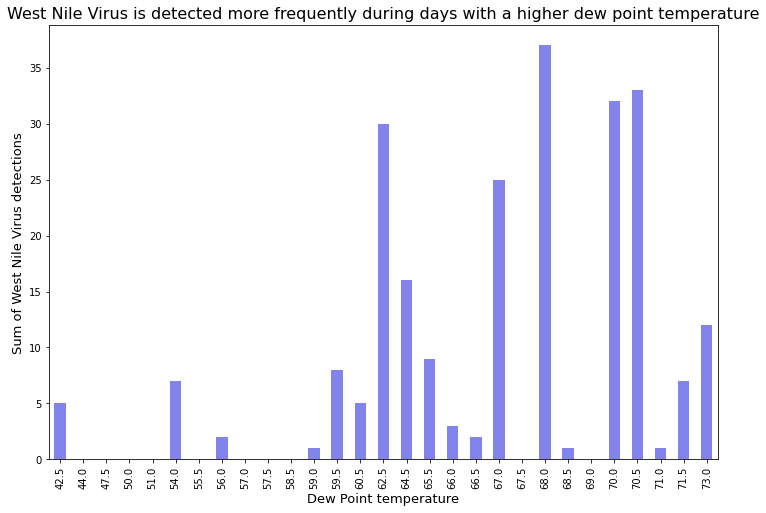

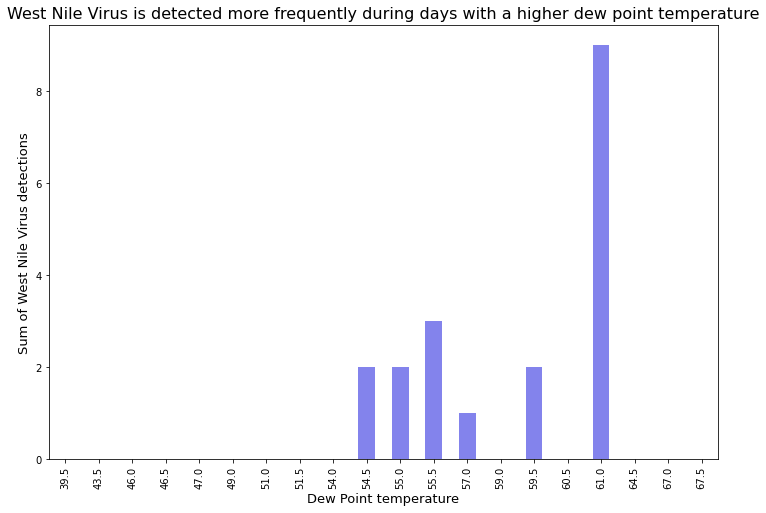

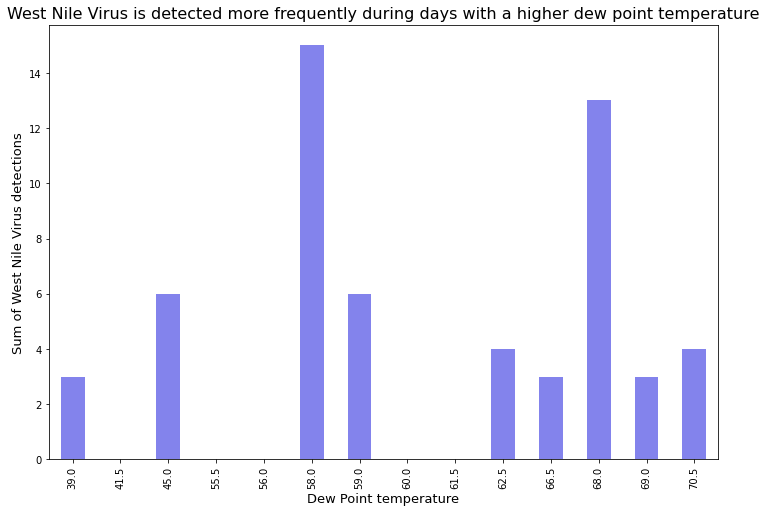

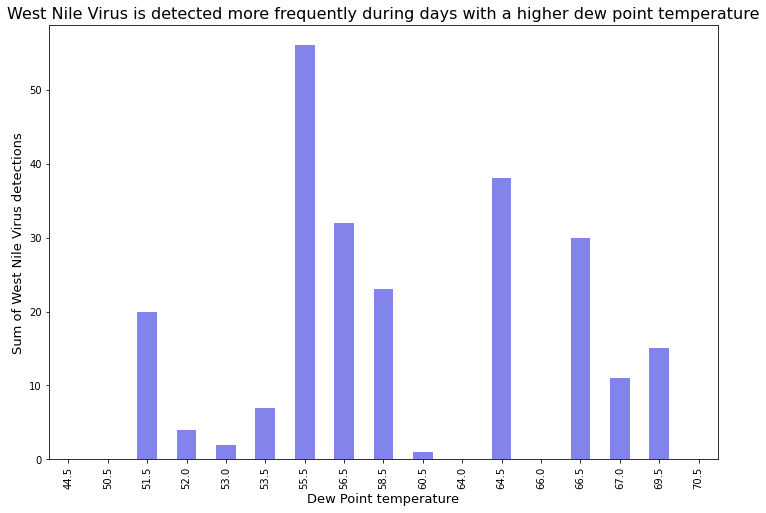

In [ ]:
for x in merged_df['Year'].unique():
    plt.figure(figsize=(12,8))
    merged_df[merged_df['Year']==x].groupby(['DewPoint'])['WnvPresent'].sum().plot.bar(color='#8383EC') 
    plt.title("West Nile Virus is detected more frequently during days with a higher dew point temperature", fontsize=16)
    plt.xlabel("Dew Point temperature", fontsize =13)
    plt.xticks(rotation=90)
    plt.ylabel("Sum of West Nile Virus detections", fontsize=13)

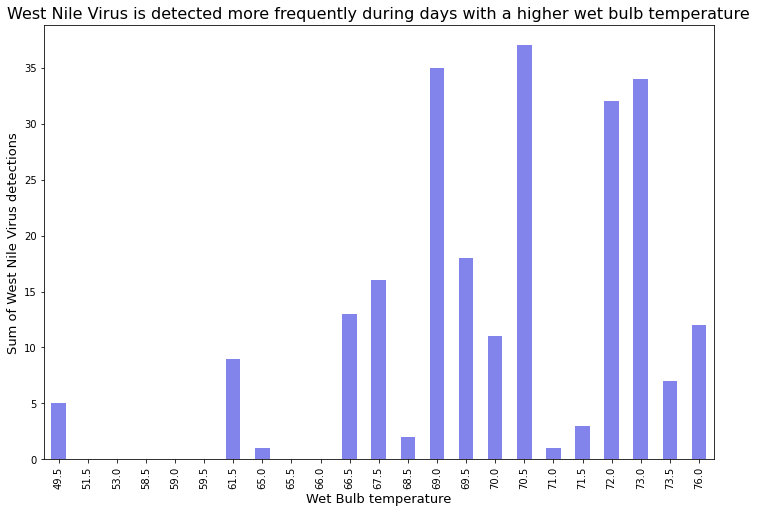

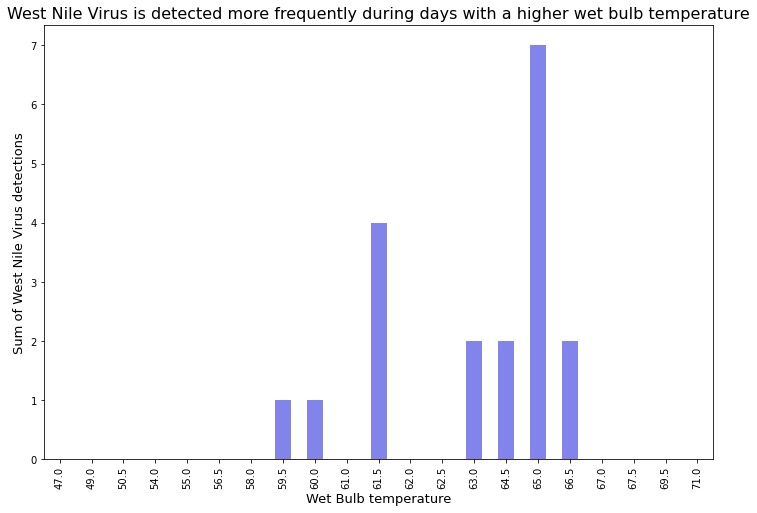

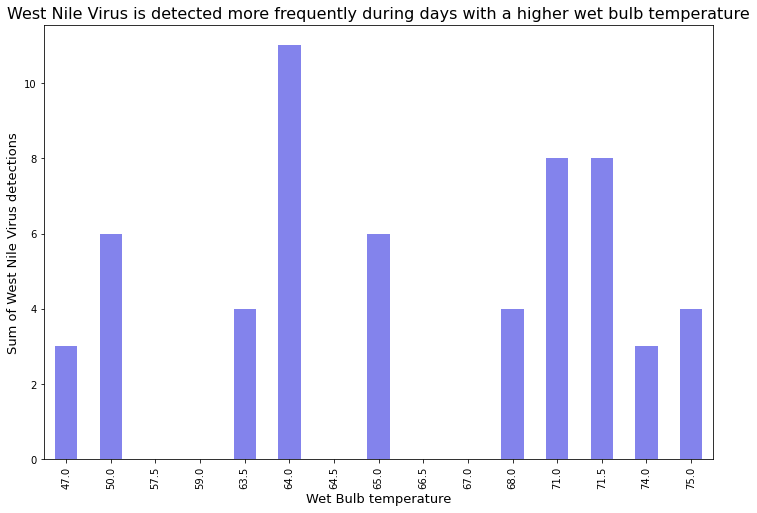

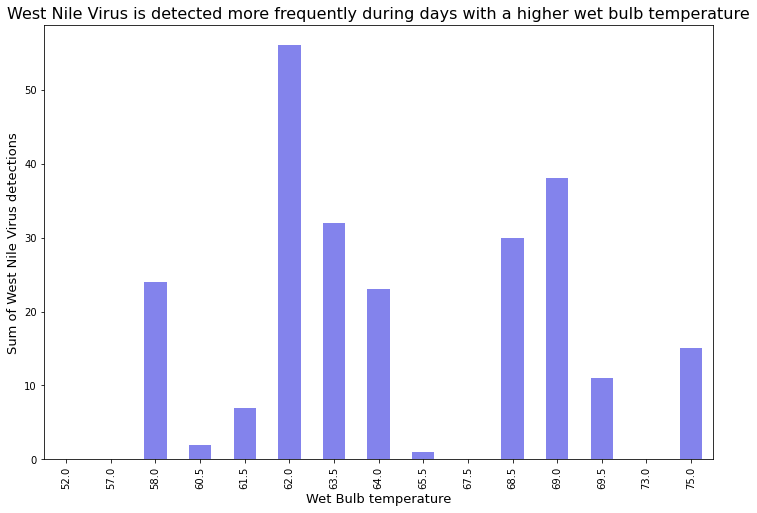

In [ ]:
for x in merged_df['Year'].unique():
    plt.figure(figsize=(12,8))
    merged_df[merged_df['Year']==x].groupby(['WetBulb'])['WnvPresent'].sum().plot.bar(color='#8383EC') 
    plt.title("West Nile Virus is detected more frequently during days with a higher wet bulb temperature", fontsize=16)
    plt.xlabel("Wet Bulb temperature", fontsize =13)
    plt.xticks(rotation=90)
    plt.ylabel("Sum of West Nile Virus detections", fontsize=13)

In [ ]:
def twin_plot(fea1, fea2):
    for x in merged_df['Year'].unique():
        fig, ax1 = plt.subplots(figsize=(12,6))

        sns.lineplot(x=merged_df[merged_df['Year']==x]['Date'], y=merged_df[merged_df['Year']==x][fea1],
                     ci=None, color='#8383EC', label=f'{fea1}', ax=ax1)
        ax1.set_xlabel('Date', fontsize=13)
        ax1.set_ylabel(f'{fea1}', fontsize=13, color='#8383EC')
        ax1.legend(loc=2)
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);

        new = merged_df[merged_df['Year']==x].groupby(['Date'])[fea2].sum()
        df_new = pd.DataFrame(new)

        ax2 = ax1.twinx()
        sns.lineplot(x=df_new.index, y=df_new[fea2],
                     ci=None, color='r', label=f'{fea2}', ax=ax2)
        ax2.set_ylabel(f'{fea2}', fontsize=13, color='r')
        ax2.legend(loc=1)

        plt.title(f'{fea1} and {fea2} in {x}')

        fig.tight_layout()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


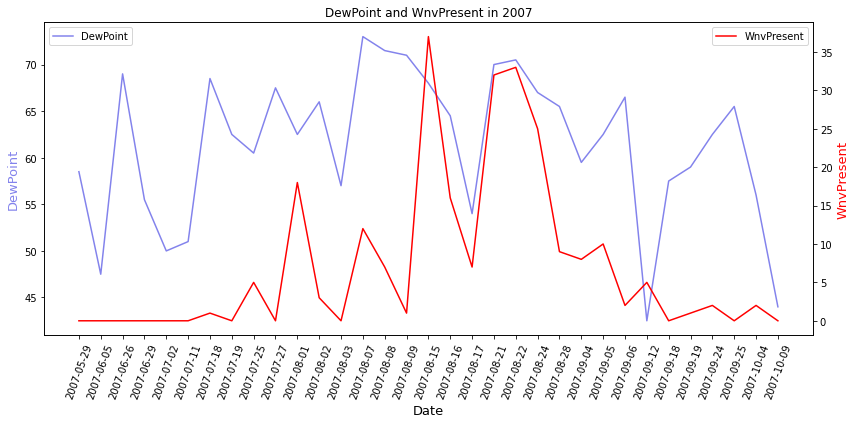

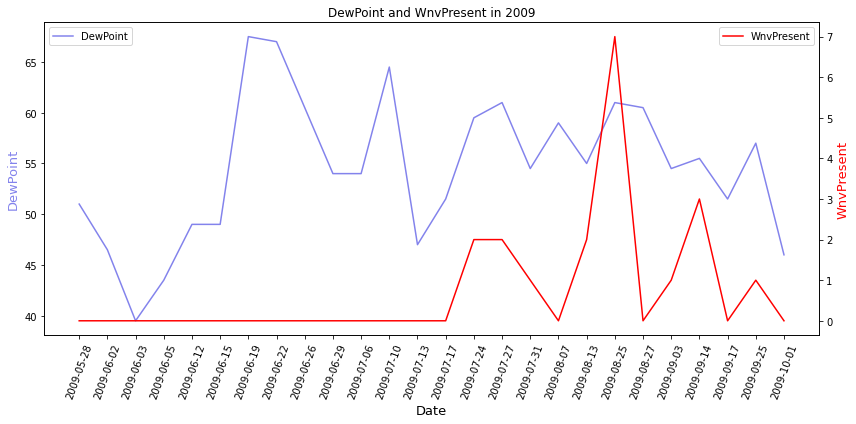

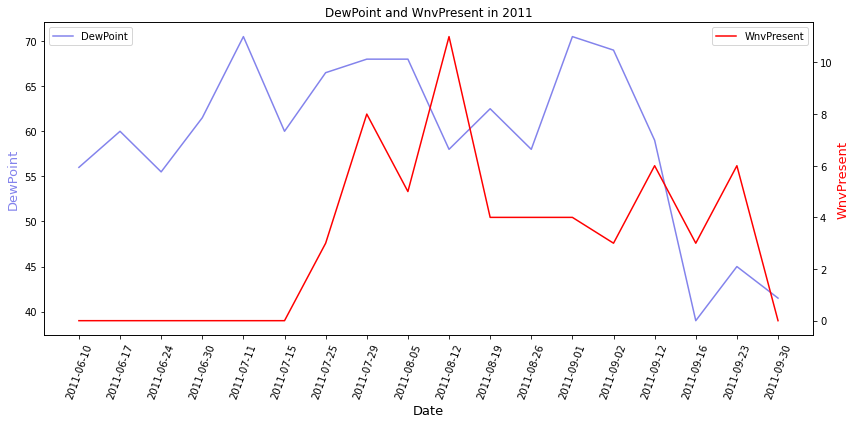

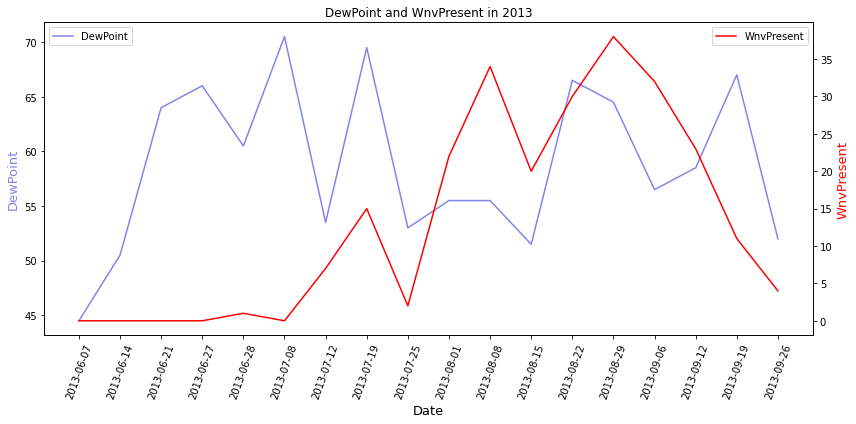

In [ ]:
twin_plot('DewPoint','WnvPresent')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


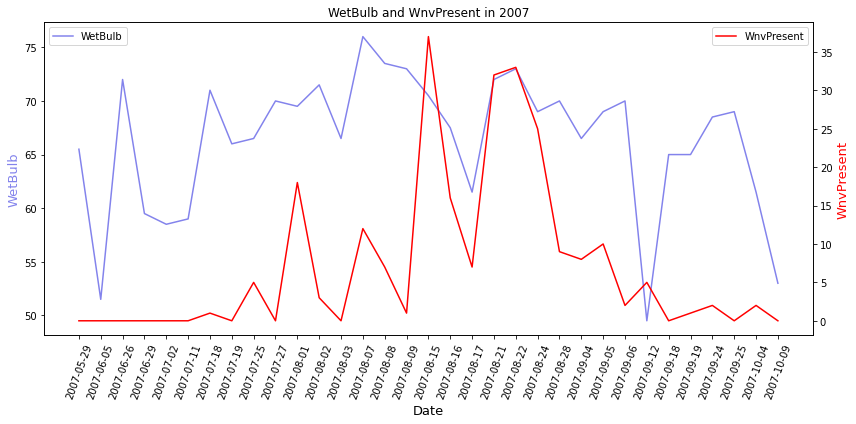

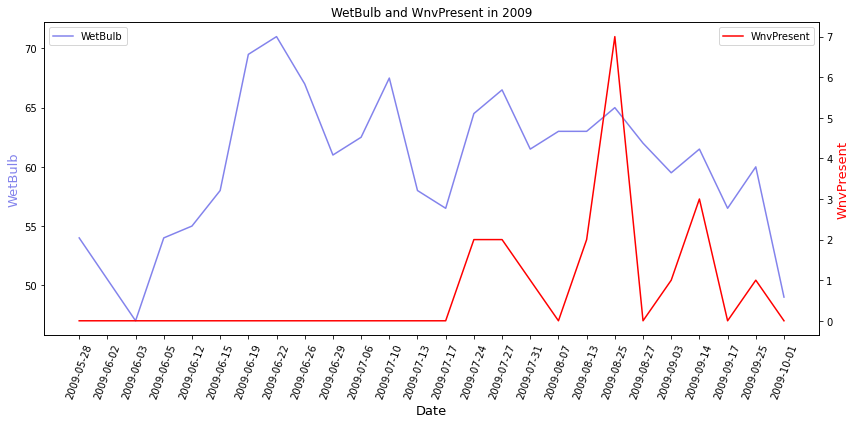

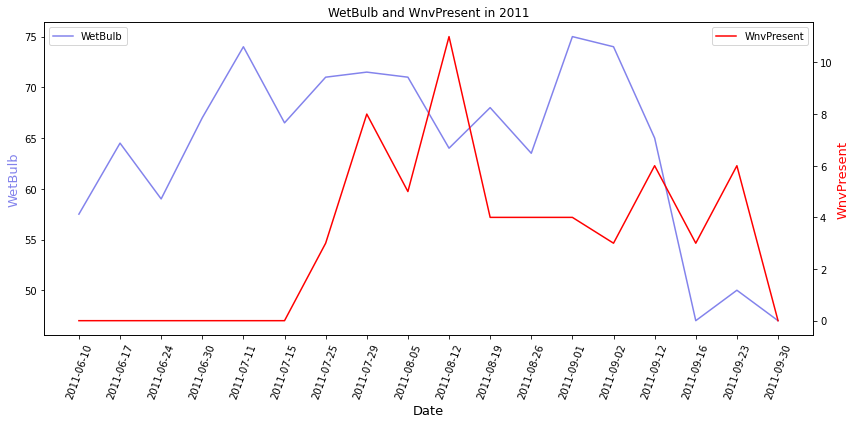

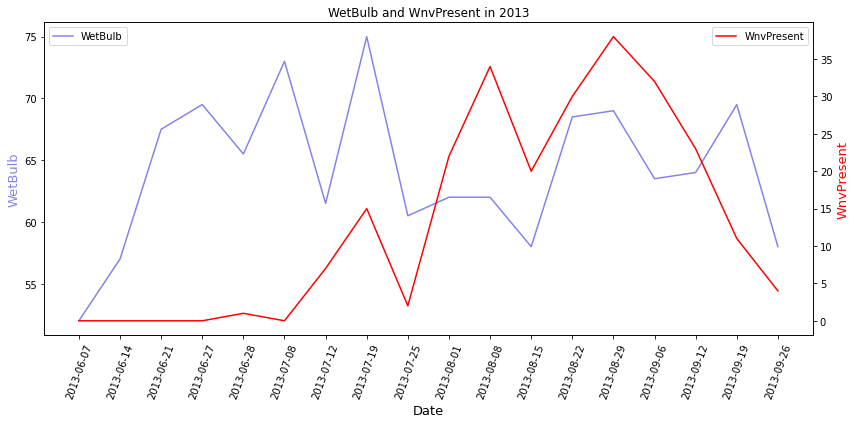

In [ ]:
twin_plot('WetBulb','WnvPresent')

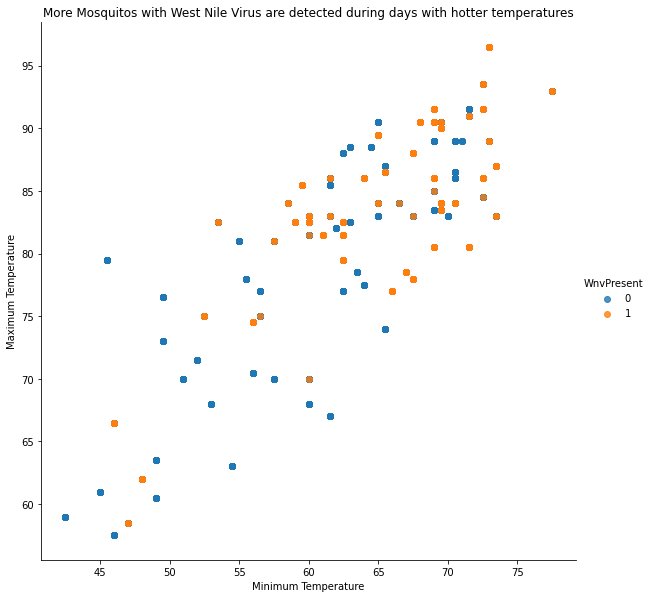

In [ ]:
sns.lmplot( x='Tmin', y='Tmax', data=merged_df, fit_reg=False, hue='WnvPresent', height=8)
plt.title('More Mosquitos with West Nile Virus are detected during days with hotter temperatures')
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature');

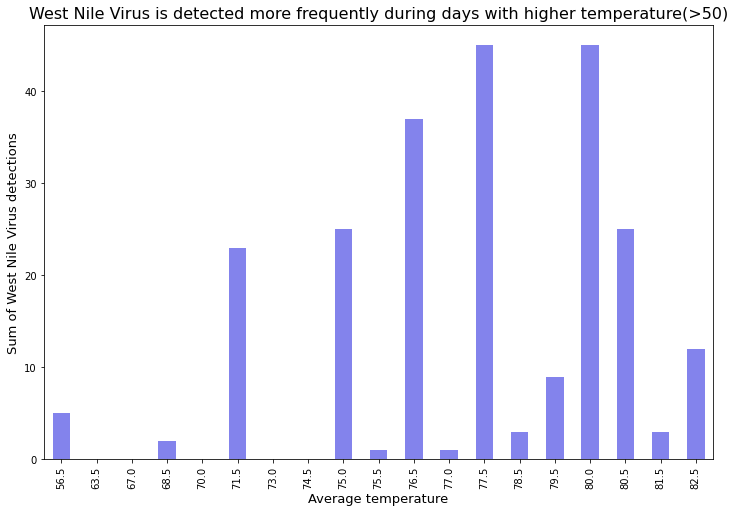

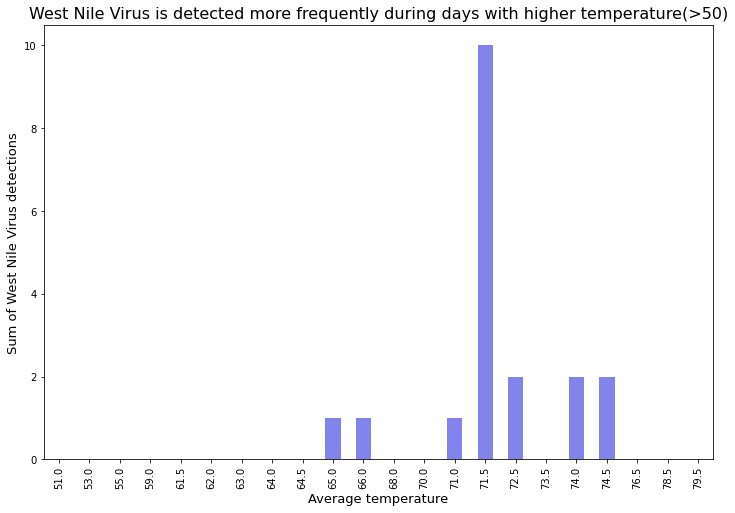

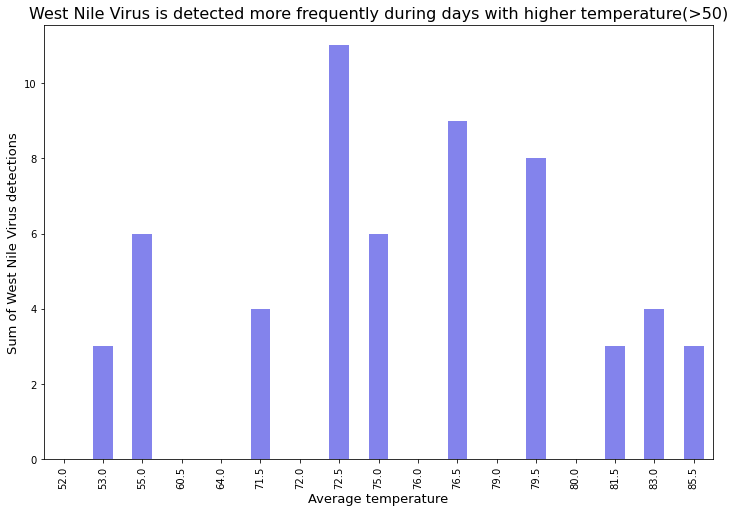

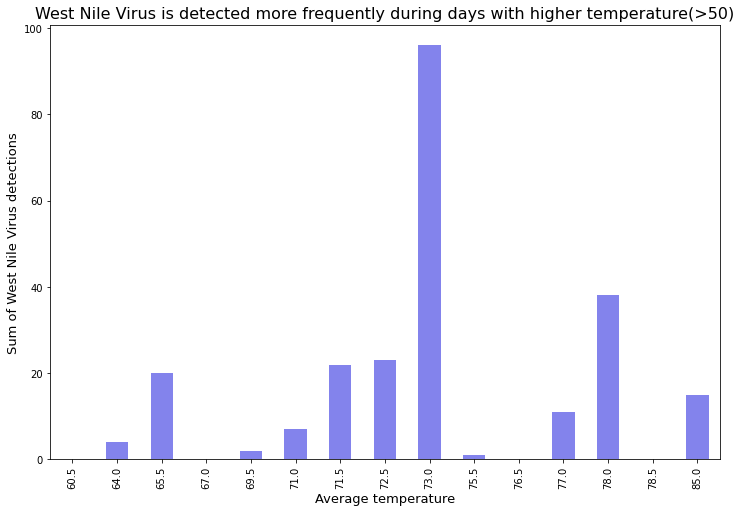

In [ ]:
for x in merged_df['Year'].unique():
    plt.figure(figsize=(12,8))
    merged_df[merged_df['Year']==x].groupby(['Tavg'])['WnvPresent'].sum().plot.bar(color='#8383EC') 
    plt.title("West Nile Virus is detected more frequently during days with higher temperature(>50)", fontsize=16)
    plt.xlabel("Average temperature", fontsize =13)
    plt.xticks(rotation=90)
    plt.ylabel("Sum of West Nile Virus detections", fontsize=13)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


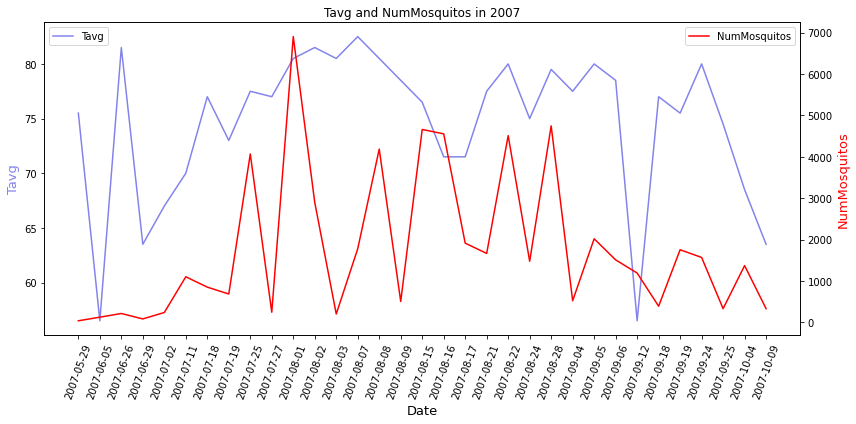

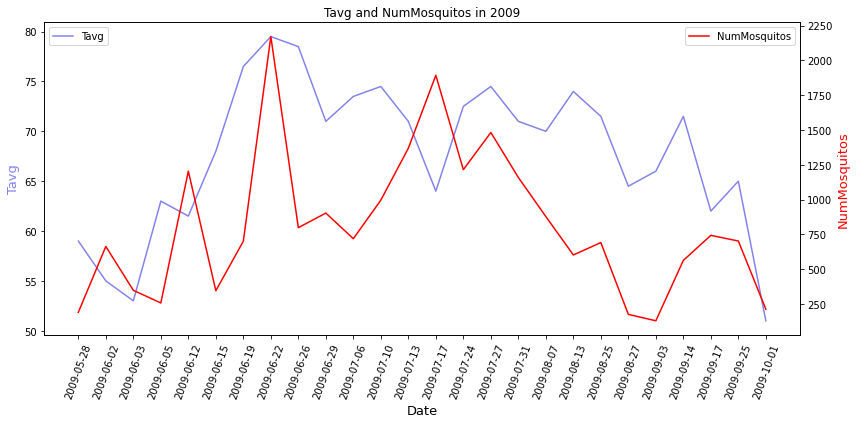

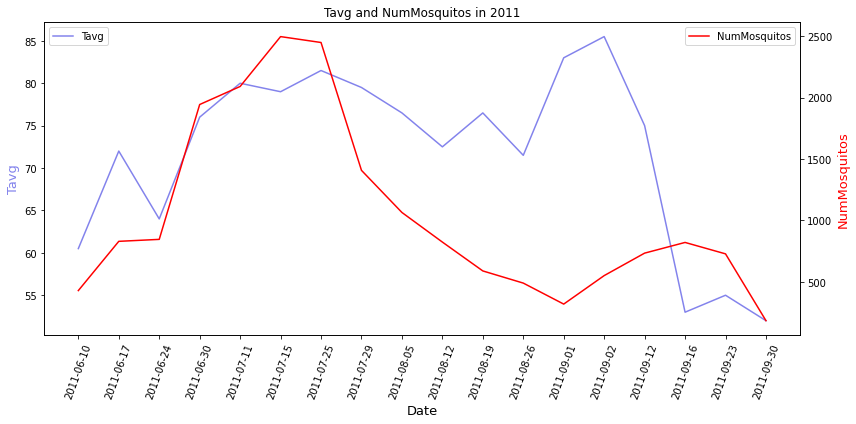

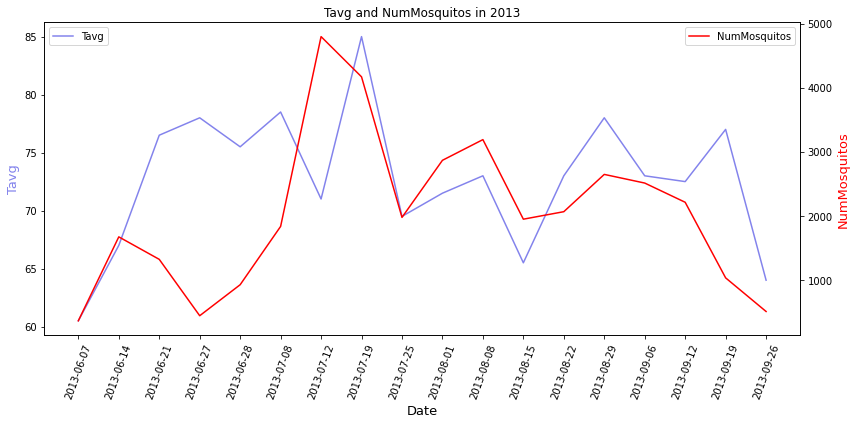

In [ ]:
twin_plot('Tavg','NumMosquitos')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


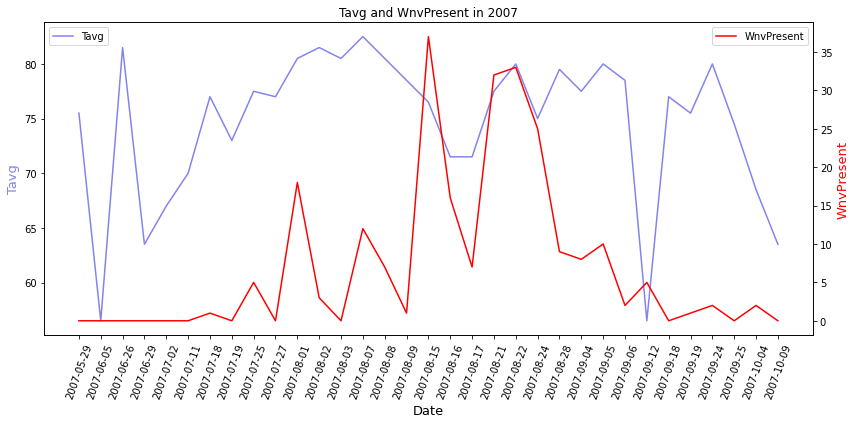

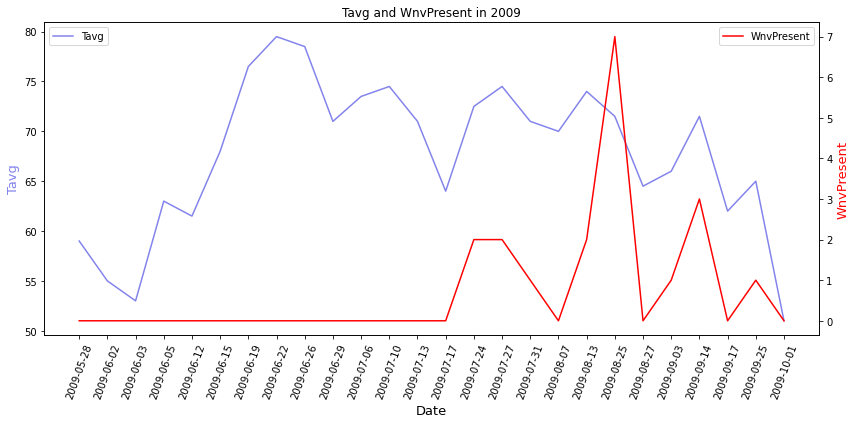

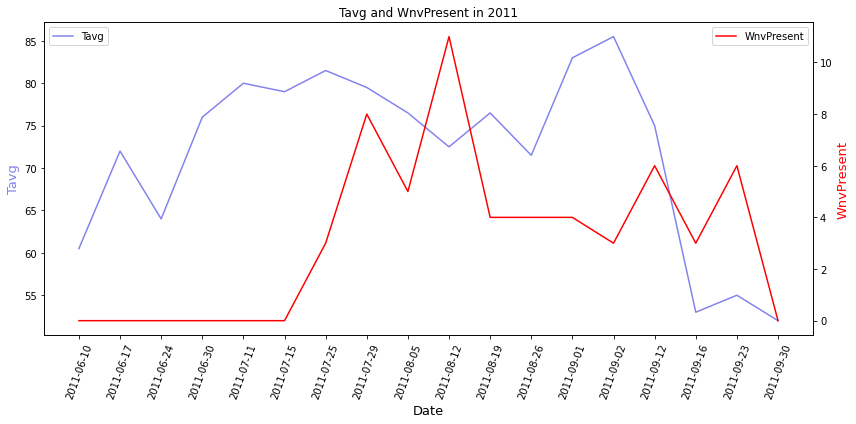

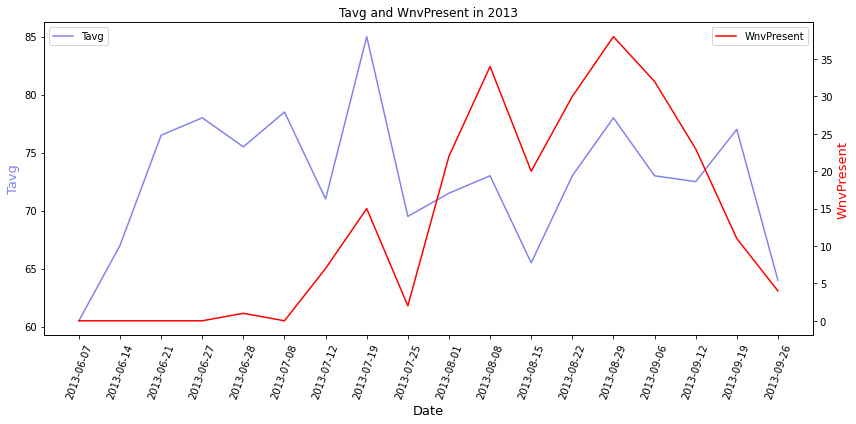

In [ ]:
twin_plot('Tavg','WnvPresent')

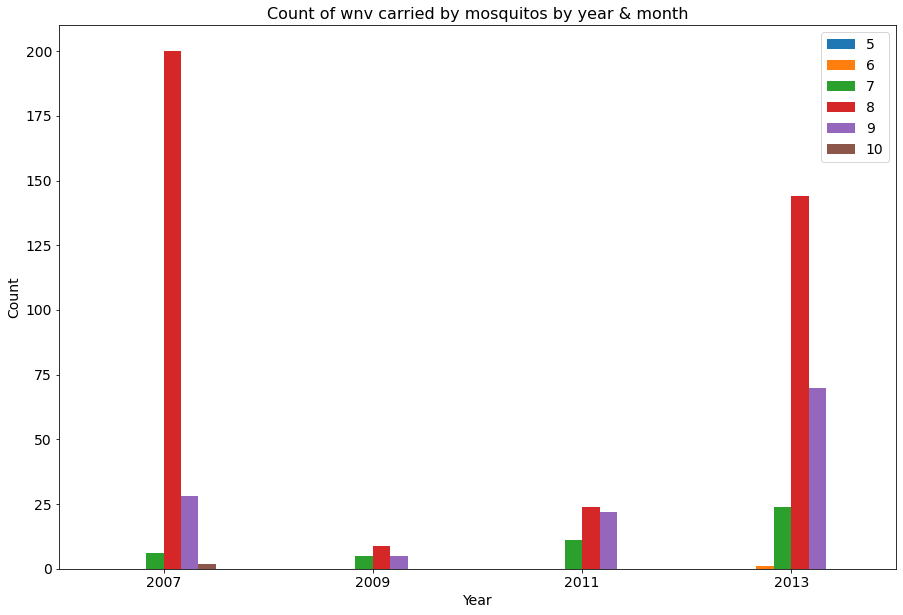

In [ ]:
# Highest number of WMN present in Jul, Aug
train.groupby(['Year','Month'])['WnvPresent'].sum().unstack().plot.bar(figsize=(15,10))
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title('Count of wnv carried by mosquitos by year & month', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.legend(fontsize=14)
plt.show()

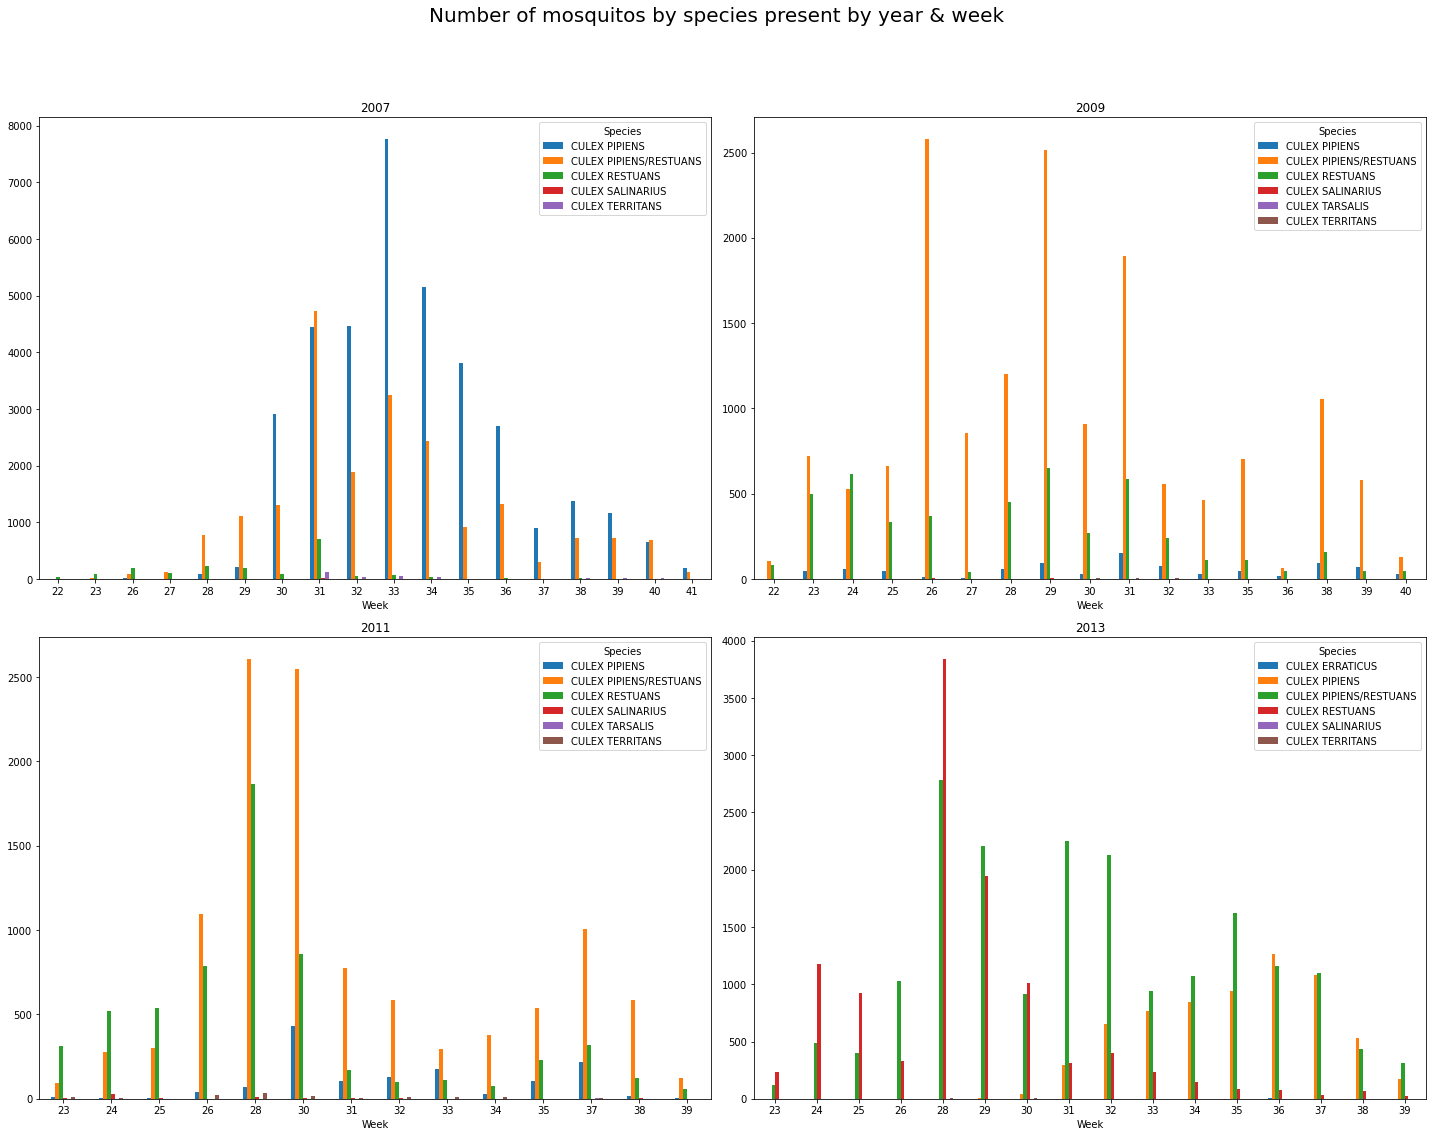

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
ax = ax.ravel()
plt.suptitle('Number of mosquitos by species present by year & week', fontsize=20, y=1.05)
for i, y in enumerate(train['Year'].unique()):
    train[train['Year']==y].groupby(['Week','Species'])['NumMosquitos'].sum().unstack(fill_value=0).plot.bar(ax=ax[i])
    ax[i].set_title(y)
    ax[i].tick_params(axis='x', labelrotation=0)
plt.tight_layout()

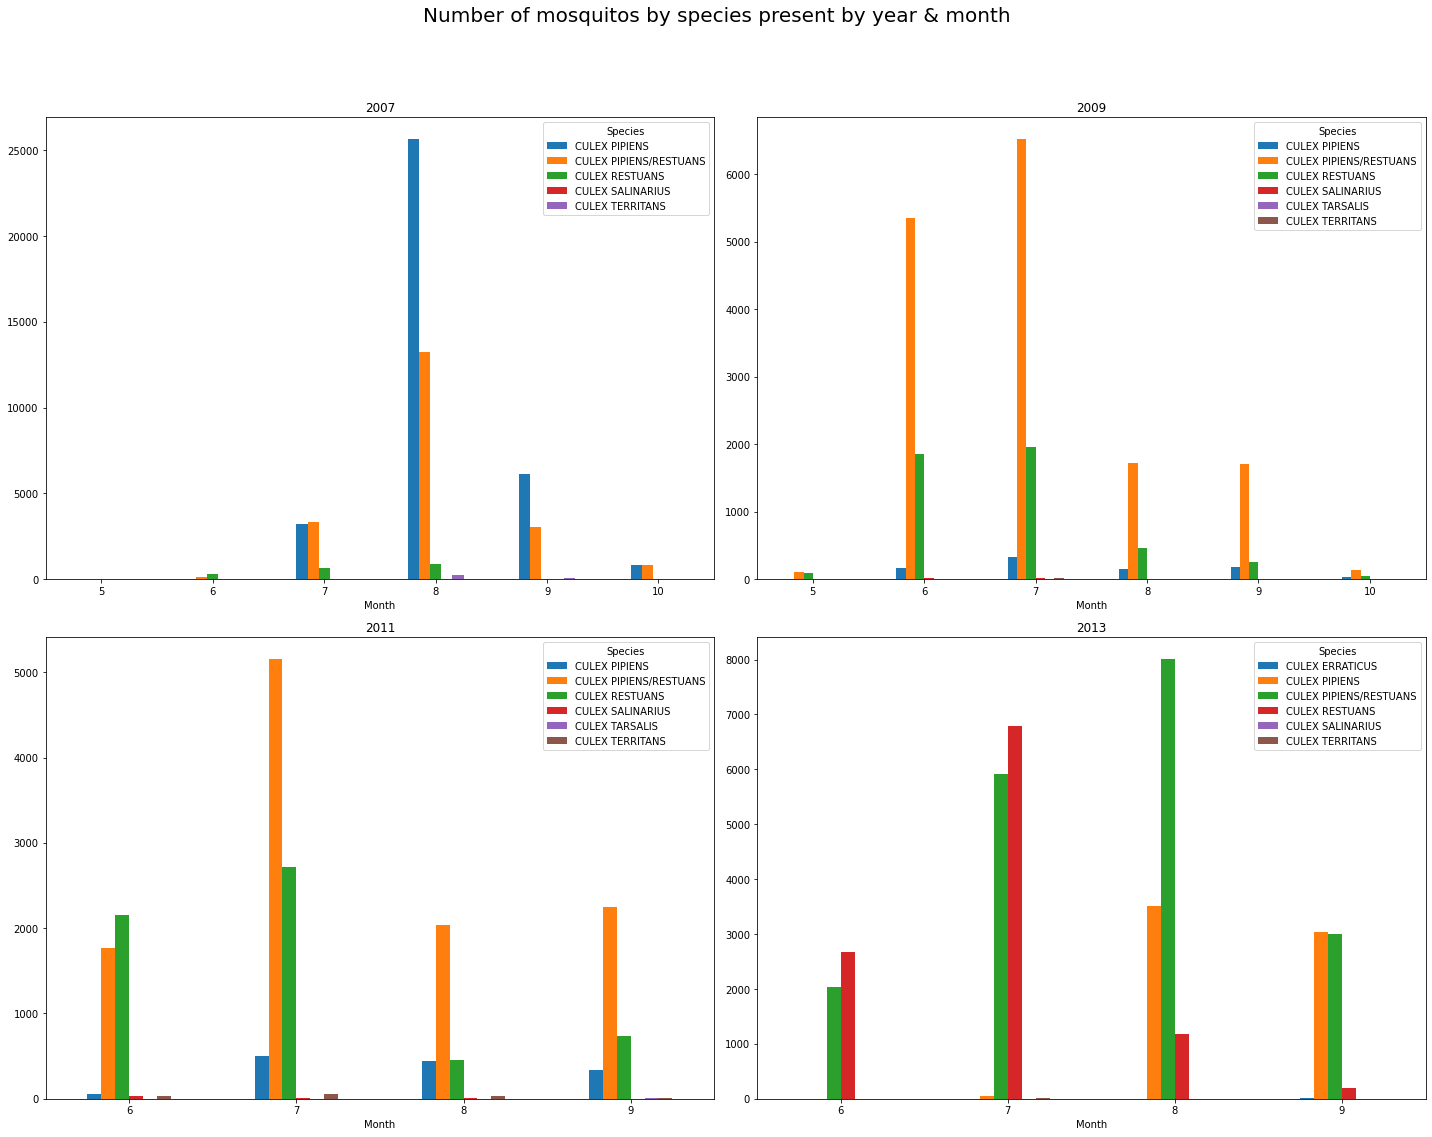

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
ax = ax.ravel()
plt.suptitle('Number of mosquitos by species present by year & month', fontsize=20, y=1.05)
for i, y in enumerate(train['Year'].unique()):
    train[train['Year']==y].groupby(['Month','Species'])['NumMosquitos'].sum().unstack(fill_value=0).plot.bar(ax=ax[i])
    ax[i].set_title(y)
    ax[i].tick_params(axis='x', labelrotation=0)
plt.tight_layout()

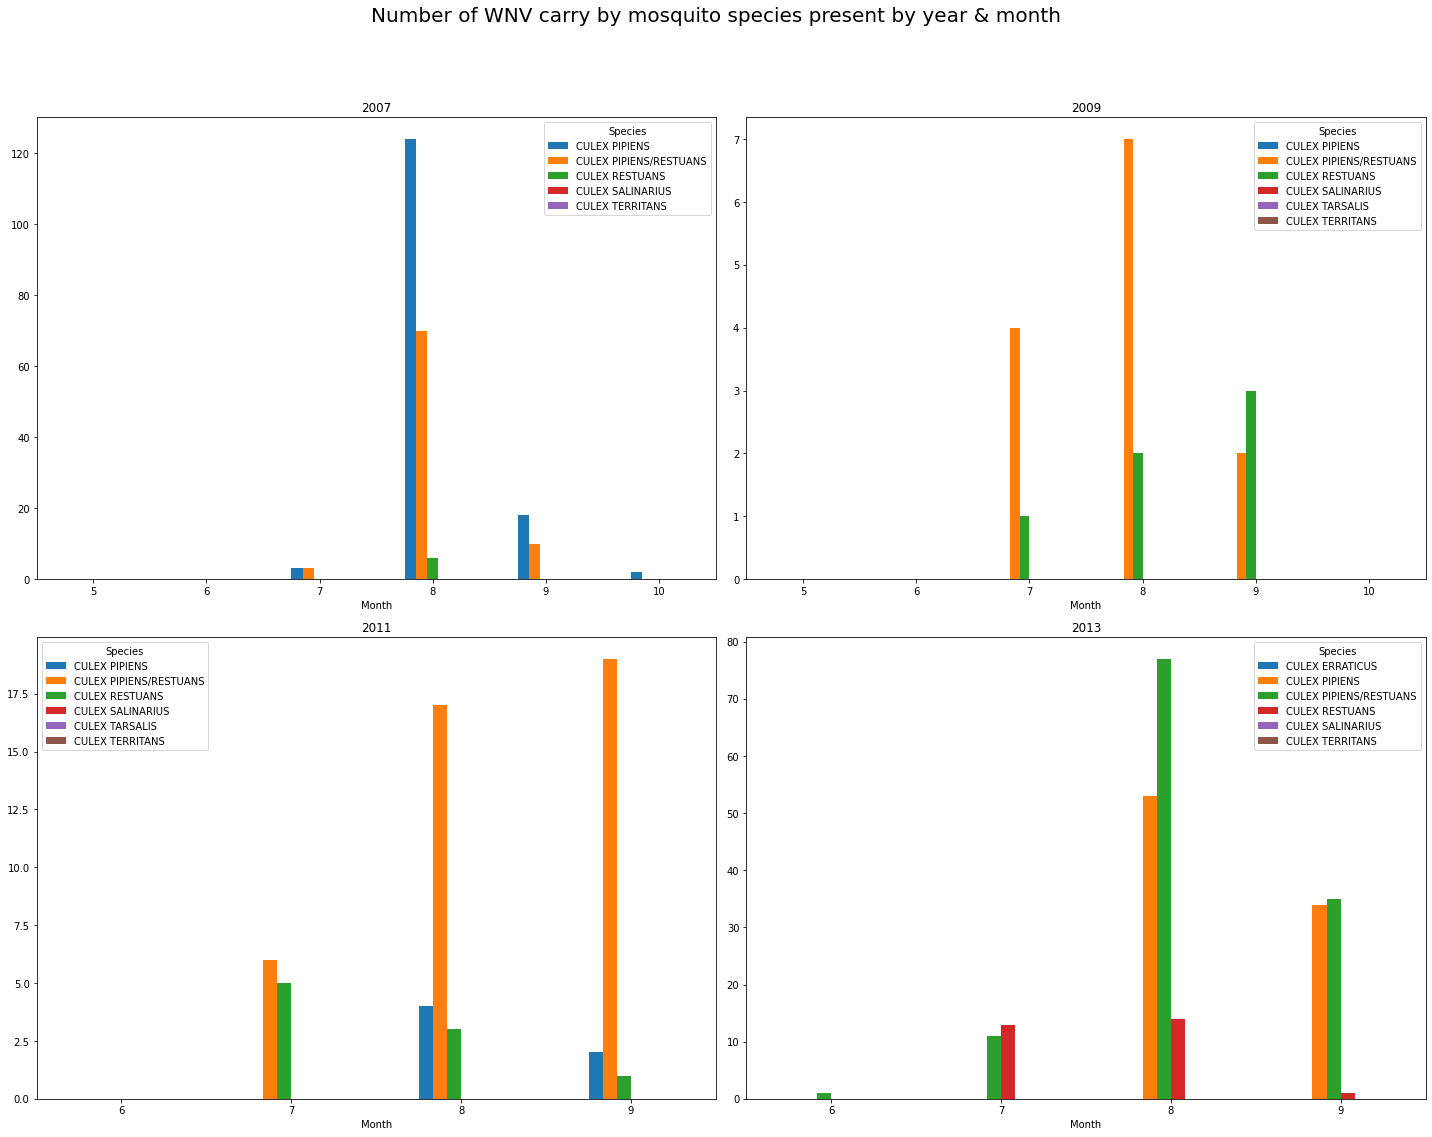

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
ax = ax.ravel()
plt.suptitle('Number of WNV carry by mosquito species present by year & month', fontsize=20, y=1.05)
for i, y in enumerate(train['Year'].unique()):
    train[train['Year']==y].groupby(['Month','Species'])['WnvPresent'].sum().unstack(fill_value=0).plot.bar(ax=ax[i])
    ax[i].set_title(y)
    ax[i].tick_params(axis='x', labelrotation=0)
plt.tight_layout()

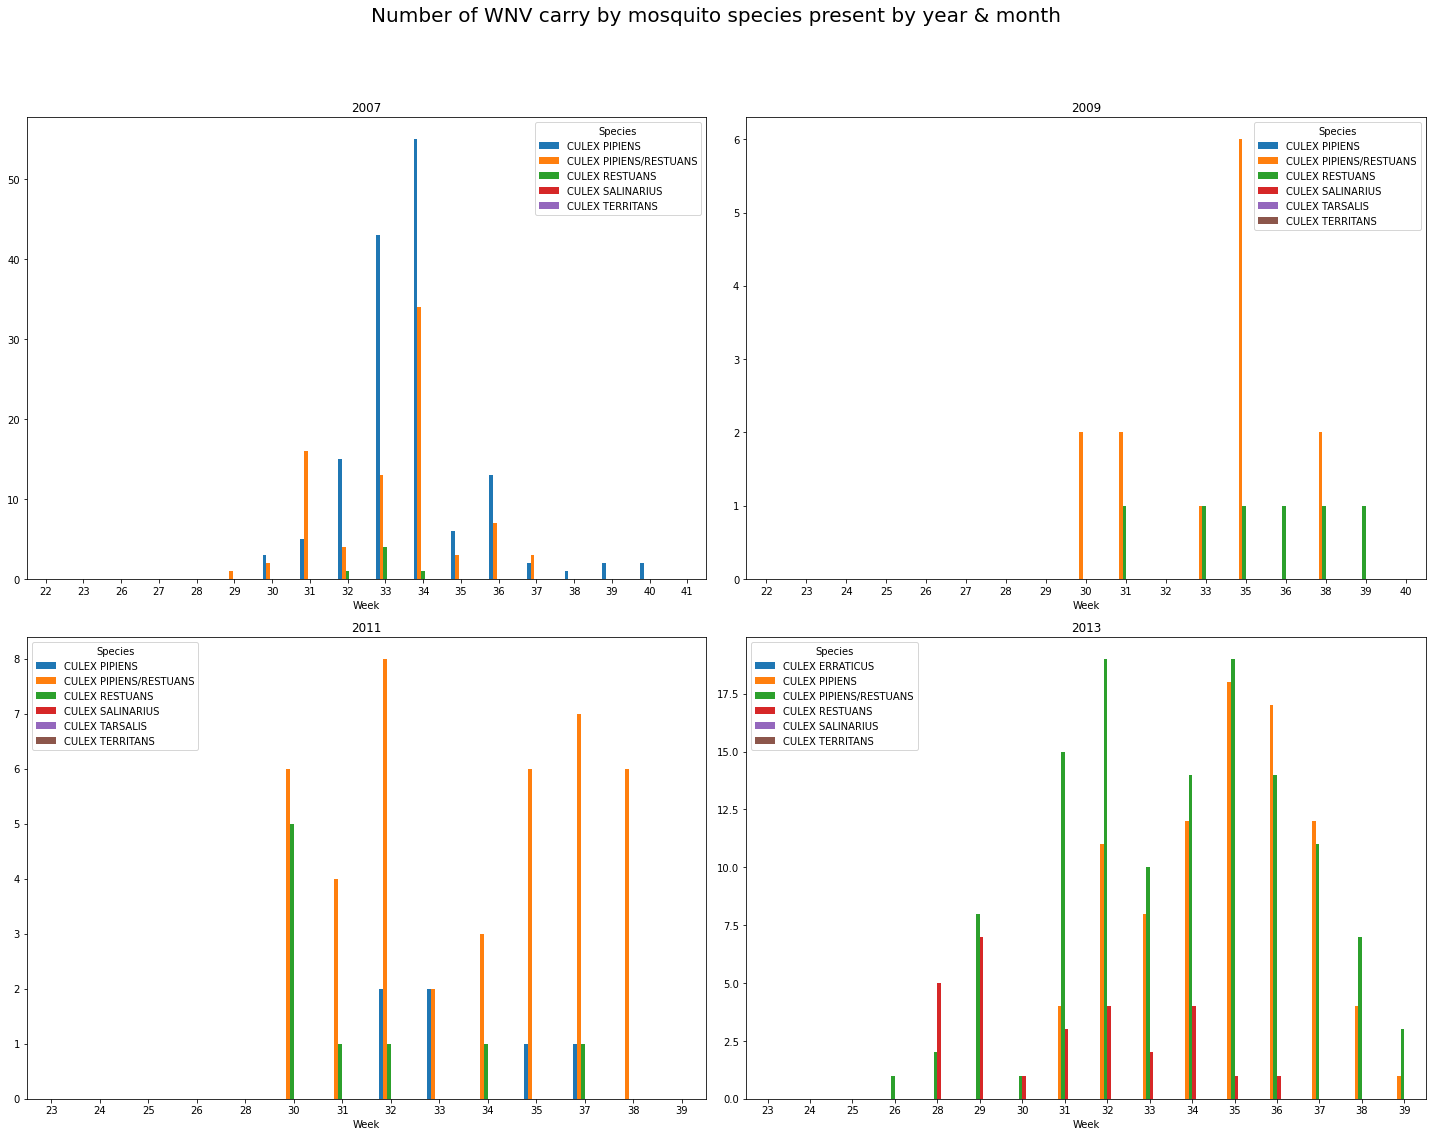

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
ax = ax.ravel()
plt.suptitle('Number of WNV carry by mosquito species present by year & month', fontsize=20, y=1.05)
for i, y in enumerate(train['Year'].unique()):
    train[train['Year']==y].groupby(['Week','Species'])['WnvPresent'].sum().unstack(fill_value=0).plot.bar(ax=ax[i])
    ax[i].set_title(y)
    ax[i].tick_params(axis='x', labelrotation=0)
plt.tight_layout()